# Regresión lineal manual (calculos manuales)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics as stats
import math
import numpy as np
from scipy.interpolate import lagrange

from google.colab import files

#uploaded = files.upload()


In [1]:
x = [12.8, 13.9, 14.1, 14.7, 15.0, 15.1, 16.0, 16.5, 16.6, 17.2, 17.9]
y = [110, 54, 98, 50, 67, 58, 52, 50, 43, 15, 28]

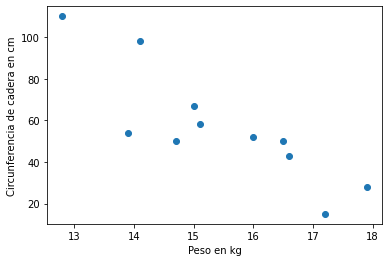

In [3]:
# Doing the scatter
plt.scatter(x, y)
plt.xlabel('Peso en kg')
plt.ylabel('Circunferencia de cadera en cm')
plt.show()

In [4]:
# Doing the math: Ex, x_media, Ey, y_media, Ex2, Ey2, Exy
ex = sum(x)
ey = sum(y)

x_media = stats.mean(x)
y_media = stats.mean(y)


In [5]:
x2 = []
for i in x:
  square = i*i
  x2.append(square)

ex2 = sum(x2)

y2 = []
for e in y:
  square = e*e
  y2.append(square)

ey2 = sum(y2)



In [6]:
len_data = len(x)
xy = []
for index in range(0, len_data):
  multiply = (x[index]) * (y[index])
  xy.append(multiply)

exy = sum(xy)


In [7]:
# xdesv, ydesv, xydesv, coefpearson
xdesv = stats.pstdev(x) #always use the poblacionst (pst) not the (st) alone
ydesv = stats.pstdev(y)

xydesv = (exy / len_data) - (x_media * y_media)

coefperson = xydesv / (xdesv * ydesv)


In [ ]:
print(coefperson)

-0.852112758280311


In [8]:
# Ecuación de la recta
def pendiente(exy, ex, ey, len_data, ex2):
  calculate_pend = (len_data * exy) - (ex * ey)
  calculate_pend2 = (len_data * ex2) - (ex ** 2)
  pendiente = calculate_pend / calculate_pend2
  print(pendiente)
  return pendiente

def ordenada(ey, ex, len_data, pendiente):
  calculate_ord = ey - (pendiente * ex)
  ordenada = calculate_ord / len_data
  print(ordenada)
  return ordenada

def prediction(ordenada, pendiente, ypredictor):
  prediction = ordenada + (pendiente * ypredictor)
  print(f'\nLa predicción para una X de {ypredictor} es una Y = {prediction}')
  #return prediction

pendiente = pendiente(exy, ex, ey, len_data, ex2)
print(exy, ex, ey, len_data, ex2)
ordenada = ordenada(ey, ex, len_data, pendiente)
predictor = 15
prediction(ordenada, pendiente, predictor)


-15.110570712059653
9286.2 169.79999999999998 625 11 2645.02
290.07044608252085

La predicción para una X de 15 es una Y = 63.41188540162605


# Regresión lineal con Scikit Learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
data = pd.read_csv('bdims.csv')
data.columns # wtg (peso en kg) and hipgi (circunferencia de cadera en cm)
wgt = data.wgt.values #y

hipgi = data.hip_gi.values #x

# El modelo lineal espera un Array 2D por lo que hubo que hacer un reshape del array, ya que tiene 1 sólo feauture
x = hipgi.reshape(-1, 1)
y = wgt.reshape(-1, 1)


In [ ]:
# Otros valores para x, y
luz = [12.8, 13.9, 14.1, 14.7, 15.0, 15.1, 16.0, 16.5, 16.6, 17.2, 17.9] #X
time = [110, 54, 98, 50, 67, 58, 52, 50, 43, 15, 28] #Y

serie_luz = pd.Series(luz)
serie_time = pd.Series(time)

x = serie_luz.values.reshape(-1, 1)
y = serie_time.values.reshape(-1, 1)


In [ ]:
# Training the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

[242.69623781]
[[-12.11797492]]
